In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import confusion_matrix,precision_score, accuracy_score, recall_score
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data_frame = pd.read_csv("winequality-red.csv")
data_frame.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
data_frame.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_frame.shape

(1599, 12)

In [5]:
# Revisión de los tipos de datos
data_frame.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de fixed acidity = 0
Total de valores nulos de volatile acidity = 0
Total de valores nulos de citric acid = 0
Total de valores nulos de residual sugar = 0
Total de valores nulos de chlorides = 0
Total de valores nulos de free sulfur dioxide = 0
Total de valores nulos de total sulfur dioxide = 0
Total de valores nulos de density = 0
Total de valores nulos de pH = 0
Total de valores nulos de sulphates = 0
Total de valores nulos de alcohol = 0
Total de valores nulos de quality = 0


In [7]:
data_frame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Total de observaciones por calidad
print(data_frame.groupby('quality').size())

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


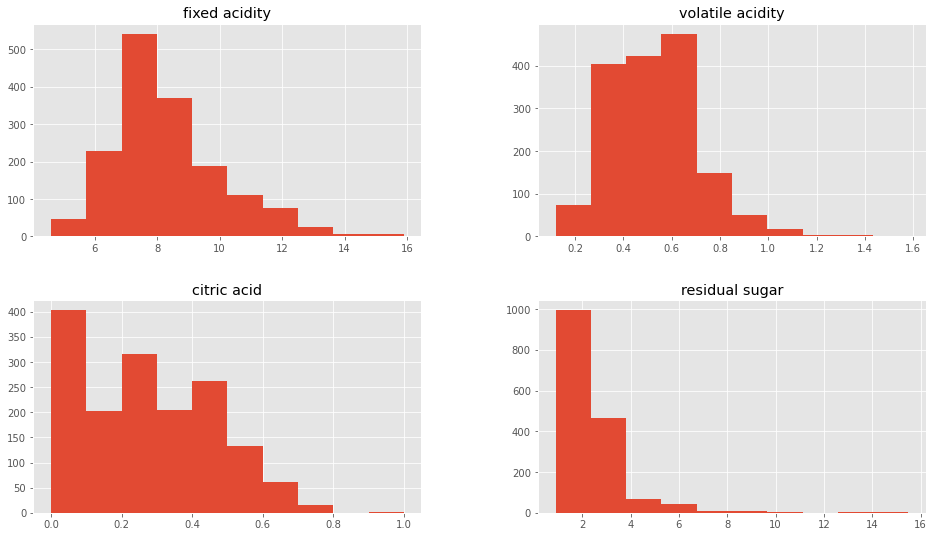

In [9]:
data_frame.drop(['quality','alcohol','sulphates','pH','density','total sulfur dioxide','free sulfur dioxide','chlorides'],1).hist()
plt.show()

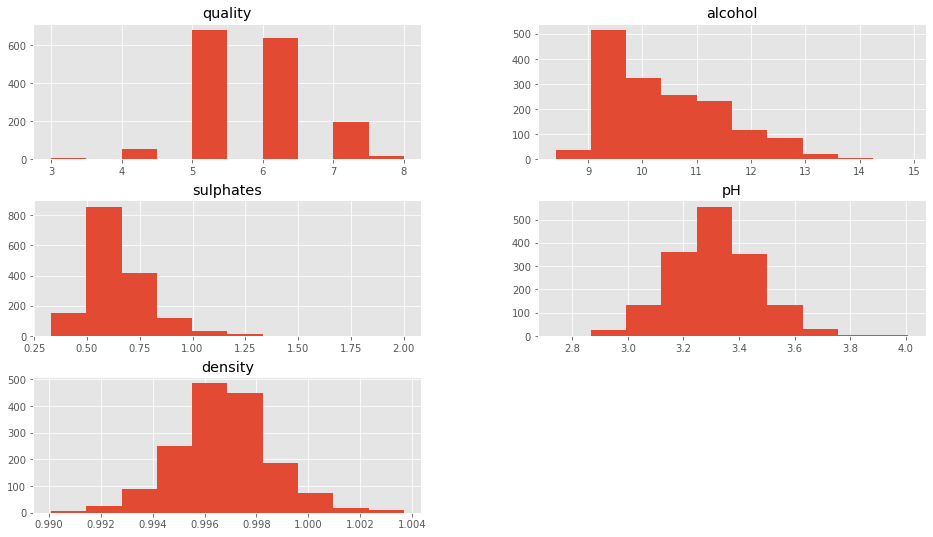

In [10]:
data_frame[['quality','alcohol','sulphates','pH','density']].hist()
plt.show()

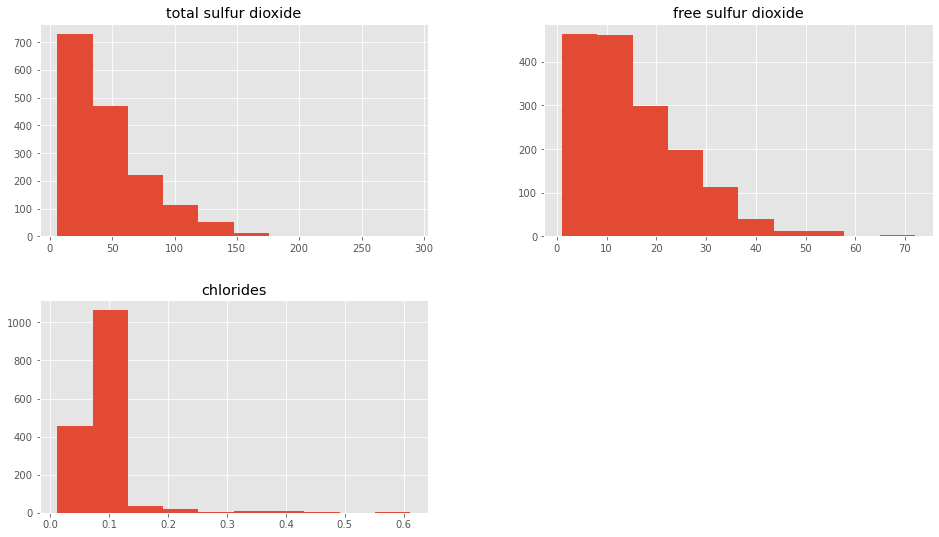

In [11]:
data_frame[['total sulfur dioxide','free sulfur dioxide','chlorides']].hist()
plt.show()

In [12]:
print(data_frame.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


AGRUPACION DE DATOS

In [13]:
X = data_frame.drop(['quality'],1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y = data_frame[['quality']]
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [16]:
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [17]:
X_train.shape

(1279, 11)

In [18]:
#ENTRENAMOS EL MODELO
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

D:\ProgramasOP\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred.shape

(320,)

In [21]:
print('Score del modelo (train): %.2f' % model.score(X_train, y_train)) # Return the coefficient of determination  of the prediction.
print('Score del modelo (test): %.2f' % model.score(X_test, y_test))

Score del modelo (train): 0.60
Score del modelo (test): 0.64


In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6375


In [23]:
matriz=confusion_matrix(y_pred,y_test)
print (matriz)

[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  3   7 105  40   6   0]
 [  0   4  19  87  24   3]
 [  0   0   0   7  12   3]
 [  0   0   0   0   0   0]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.65      0.85      0.74       124
           6       0.64      0.65      0.64       134
           7       0.55      0.29      0.37        42
           8       0.00      0.00      0.00         6

    accuracy                           0.64       320
   macro avg       0.31      0.30      0.29       320
weighted avg       0.59      0.64      0.60       320



D:\ProgramasOP\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
